# Regression Week 3: Assessing Model Performance Quiz 2

## Polynomial Regression Quiz

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
1. Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
2. Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
3. Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
4. Use a validation set to select a polynomial degree
5. Assess the final fit using test data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import zipfile
import os
import glob
from math import log
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Unzip the csv files (datasets)

In [2]:
# Extract all zips in the folder data sets
for root, dirs, files in os.walk("./datasets", topdown=False):
    zip_files = glob.glob(root + '/*.zip')
    print("Unzipping...")
    print(zip_files)
    for zip_filename in zip_files:
        dir_name = os.path.splitext(zip_filename)[0]
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(root)

Unzipping...
['./datasets\\kc_house_data.csv.zip', './datasets\\wk3_kc_house_set_1_data.csv.zip', './datasets\\wk3_kc_house_set_2_data.csv.zip', './datasets\\wk3_kc_house_set_3_data.csv.zip', './datasets\\wk3_kc_house_set_4_data.csv.zip', './datasets\\wk3_kc_house_test_data.csv.zip', './datasets\\wk3_kc_house_train_data.csv.zip', './datasets\\wk3_kc_house_valid_data.csv.zip']


####  Load the csv data in pandas dataframes

In [3]:
# Dictionary with the correct dtypes for the DataFrame columns
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 
              'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

house_data = pd.read_csv('./datasets/kc_house_data.csv', dtype = dtype_dict)
set1_data = pd.read_csv('./datasets/wk3_kc_house_set_1_data.csv', dtype = dtype_dict)
set2_data = pd.read_csv('./datasets/wk3_kc_house_set_2_data.csv', dtype = dtype_dict)
set3_data = pd.read_csv('./datasets/wk3_kc_house_set_3_data.csv', dtype = dtype_dict)
set4_data = pd.read_csv('./datasets/wk3_kc_house_set_4_data.csv', dtype = dtype_dict)
test_data = pd.read_csv('./datasets/wk3_kc_house_test_data.csv', dtype = dtype_dict)
train_data = pd.read_csv('./datasets/wk3_kc_house_train_data.csv', dtype = dtype_dict)
valid_data = pd.read_csv('./datasets/wk3_kc_house_valid_data.csv', dtype = dtype_dict)

#### 1.You’re going to write a function that adds powers of a feature to columns of a data frame

In [4]:
train_data['bedrooms'].apply(lambda x: x**3).head()

0    64
1    64
2     8
3    27
4    27
Name: bedrooms, dtype: float64

#### 2.Write your own function called ‘polynomial_sframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    if degree<1:
        raise ValueError
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

#### 3.For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [6]:
sales = house_data.sort_values(by=['sqft_living','price'])

#### 4.Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [7]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)

#### 5.Add sales[‘price’] to poly1_data as this will be our output variable.

In [8]:
poly1_data['price'] = sales['price']

#### 6.Compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [9]:
model1 = LinearRegression()
features = ['power_1']
target = 'price'
model1.fit(poly1_data[features], poly1_data[target])
[model1.coef_, model1.intercept_]

[array([ 280.6235679]), -43580.743094472913]

#### 7.Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model.

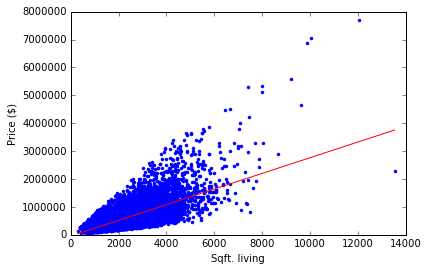

(array([ 280.6235679]), -43580.743094472913)


In [16]:
# The resulting plot should look like a cloud of points with a straight line passing through.
plt.plot(sales['sqft_living'],sales['price'], ".")
plt.xlabel("Sqft. living")
plt.ylabel("Price ($)")
plt.hold(True)
# sales['sqft_living']*model1.coef_+ model1.intercept_ === model1.predict(sales[features])
plt.plot(sales['sqft_living'], model1.predict(poly1_data[features]), "-r")
plt.show()
print(model1.coef_, model1.intercept_)

#### 8.Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

Model 2 coef and intercept: [  6.79940947e+01   3.85812609e-02], 199222.279305
Model 3 coef and intercept: [ -9.01819864e+01   8.70465089e-02  -3.84055260e-06], 336819.748221


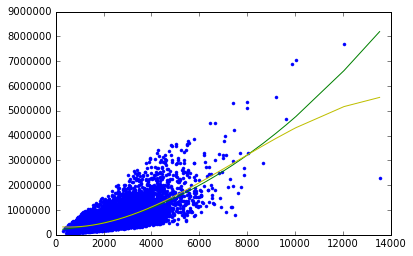

In [17]:
target = 'price'
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
model2 = LinearRegression()
model3 = LinearRegression()
features_model2 = poly2_data.columns
features_model3 = poly3_data.columns
poly2_data['price'] = sales['price']
poly3_data['price'] = sales['price']
model2.fit(poly2_data[features_model2], poly2_data[target])
model3.fit(poly3_data[features_model3], poly3_data[target])
print("Model 2 coef and intercept: %s" %  ", ".join([str(model2.coef_), str(model2.intercept_)]))
print("Model 3 coef and intercept: %s" %  ", ".join([str(model3.coef_), str(model3.intercept_)]))
plt.plot(sales['sqft_living'],sales['price'], ".",
         poly2_data['power_1'], model2.predict(poly2_data[features_model2]), "-g",
         poly3_data['power_1'], model3.predict(poly3_data[features_model3]), "-y")

#### 9.Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

Model 15 coef and intercept: [  4.56404164e-91  -2.69272563e-50   8.00907496e-56   4.97841222e-60
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53], 537116.329638


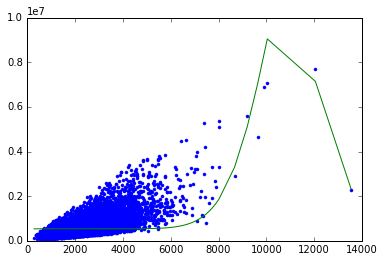

In [19]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = poly15_data.columns # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = LinearRegression()
model15.fit(poly15_data[my_features], poly15_data[target])
print("Model 15 coef and intercept: %s" %  ", ".join([str(model15.coef_), str(model15.intercept_)]))
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data[my_features]),'-')

Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
       u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
       u'power_12', u'power_13', u'power_14', u'power_15'],
      dtype='object')
Model coefs and intercept: [  4.56404164e-91  -2.69272563e-50   8.00907496e-56   4.97841222e-60
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53], 537116.329638


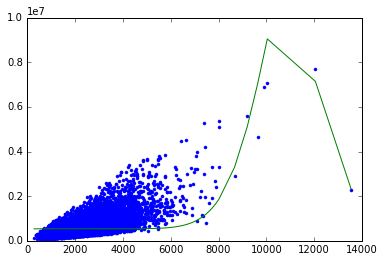

In [18]:
# Seems like next questions have to do with trying out different datasets with different degrees, therefor I create a function
def polynomial_checker(data, degree):
    target = 'price'
    poly_data = polynomial_dataframe(data['sqft_living'], degree)
    model = LinearRegression()
    features_model = poly_data.columns
    print(features_model)
    poly_data['price'] = data['price']
    model.fit(poly_data[features_model], poly_data[target])
    print("Model coefs and intercept: %s" %  ", ".join([str(model.coef_), str(model.intercept_)]))
    plt.plot(poly_data['power_1'],poly_data['price'], ".",
         poly_data['power_1'], model.predict(poly_data[features_model]), "-g")
polynomial_checker(sales, 15)

10.Create four subsets as follows:
1. first split sales into 2 subsets with .random_split(.5) use seed = 0!
2. next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
3. you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4
4. If you’re not using SFrames then please download the provided csv files for each subset.

11.Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

12.Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?

13.Quiz Question: True/False the plotted fitted lines look the same in all four plots



14.Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows:

1. First split sales into training_and_validation and testing with sales.random_split(0.9) use seed = 1!
2. Next split training_and_validation into training and validation using .random_split(0.5) use seed = 1!
3. If you’re not using SFrames then please download the provided csv files for training, validation and test data.

15.Now for each degree from 1 to 15:

1. Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
2. Add training_data[‘price’] as a column to your polynomial data set
3. Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
4. Compute the RSS on VALIDATION for the current model (print or save the RSS)

16.Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

17.Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

18.Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)